In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score,silhouette_score
from sklearn.decomposition import PCA

In [5]:
with open('metrics/k_values_metrics_processed.txt', 'r') as f:
    metrics_raw = f.read()
metrics_raw = metrics_raw.split('\n')

In [6]:
def get_metrics(filename, iterator):
    iteration_list = []
    k_values_list = []
    sum_of_squared_distances_list = []
    silhouette_euc_list = []
    silhouette_cos_list = []
    delta1_list = []
    delta2_list = []
    for i in filename:
        extraction_regex = re.match(r'(?P<iter>\d+)\,(?P<k>\d+)\,(?P<elbow>\d+\.\d+)\,(?P<sil_euc>\d+\.\d+)\,(?P<sil_cos>\d+\.\d+)',i)
        if extraction_regex:
            iteration = extraction_regex.group('iter')
            if iteration == str(iterator):
                k_value = extraction_regex.group('k') 
                sum_of_squared_distances = extraction_regex.group('elbow')
                sil_coef_euc = extraction_regex.group('sil_euc')
                sil_coef_cos = extraction_regex.group('sil_cos')
                iteration_list.append(int(iteration))
                k_values_list.append(int(k_value))
                sum_of_squared_distances_list.append(float(sum_of_squared_distances))
                silhouette_euc_list.append(float(sil_coef_euc))
                silhouette_cos_list.append(float(sil_coef_cos))

    delta1 = [x-y for x, y in zip(sum_of_squared_distances_list, sum_of_squared_distances_list[1:])]
    delta2 = [x-y for x, y in zip(delta1, delta1[1:])]
    delta1_range = (len(sum_of_squared_distances_list) - len(delta1))
    delta2_range = len(sum_of_squared_distances_list) - len(delta2)
    for i in range(delta1_range):
        delta1.insert(0,0.0)
    for i in range(delta2_range):
        delta2.insert(0,0.0)
    return(iteration_list, 
           k_values_list,
           sum_of_squared_distances_list,
           silhouette_euc_list,
           silhouette_cos_list,
           delta1,
           delta2)

def get_metrics_dataframe(filename, iterator):
    iterator, k, metric1, metric2, metric3, delta1, delta2 =  get_metrics(filename,iterator)
    data_tuples = list(zip(iterator,
                       k,
                       metric1,
                       metric2, metric3, delta1 , delta2))
    dataframe = pd.DataFrame(data_tuples, columns=['iterator',
                                              'k_value',
                                              'sum_of_squared_distances',
                                              'sil_coef_euc','sil_coef_cos','delta1','delta2'])
    return dataframe

def plot_elbow(x,y,x_max,y_max,x_rel_max,y_rel_max,iteration):
    title = 'Elbow plot in iteration %s' % iteration
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111);
    plt.title(title)
    plt.xlabel('K value')
    plt.ylabel('Sum of squared distances')
    ax.plot(x, y);
    ax.plot(x_max, y_max, color='red',
            marker='o',
            markersize=7);
    ax.plot(x_rel_max, y_rel_max,
            color='green',
            marker='o',
            markersize=7);
    annotation_label_strength = 'K value of %s is the highest strength' % x_max
    annotation_label_rel_strength = 'K value of %s is the highest relative strength' % x_rel_max
    ax.annotate(annotation_label_strength, 
                xy = (x_max,y_max), 
                xytext=(x_max + 10, y_max + 1000),
                arrowprops=dict(facecolor='black', shrink=0.01));
    ax.annotate(annotation_label_rel_strength, 
                xy = (x_rel_max,y_rel_max), 
                xytext=(x_rel_max + 10, y_rel_max + 1000),
                arrowprops=dict(facecolor='black',
                                shrink=0.01));

def calculate_metrics_streght(df):
    df['is_elbow'] = np.where(df['delta2'] > df['delta1'],True,False)
    df['strength'] = np.where(df['is_elbow'],df['delta2'] - df['delta1'],np.nan)
    df['relative_strength'] = np.where(df['strength'],df['strength']/df.k_value,np.nan)
    return df

def get_values_for_plot(df):
    x = df.k_value
    y= df.sum_of_squared_distances
    x_max = df[df['strength']==df['strength'].max()].k_value.values
    print(x_max)
    y_max = df[df['strength']==df['strength'].max()].sum_of_squared_distances
    x_rel_max = df[df['relative_strength']==df['relative_strength'].max()].k_value.values
    y_rel_max = df[df['relative_strength']==df['relative_strength'].max()].sum_of_squared_distances.values
    return(x,y, x_max, y_max, x_rel_max, y_rel_max)

In [7]:
k_df_raw_1 = get_metrics_dataframe(metrics_raw,1)
k_df_raw_2 = get_metrics_dataframe(metrics_raw,2)
k_df_raw_3 = get_metrics_dataframe(metrics_raw,3)
k_df_raw_4 = get_metrics_dataframe(metrics_raw,4)
k_df_raw_5 = get_metrics_dataframe(metrics_raw,5)

In [8]:
k_df_raw_1 = calculate_metrics_streght(k_df_raw_1)
k_df_raw_2 = calculate_metrics_streght(k_df_raw_2)
k_df_raw_3 = calculate_metrics_streght(k_df_raw_3)
k_df_raw_4 = calculate_metrics_streght(k_df_raw_4)
k_df_raw_5 = calculate_metrics_streght(k_df_raw_5)

[8]
[87]
[121]
[9]
[8]


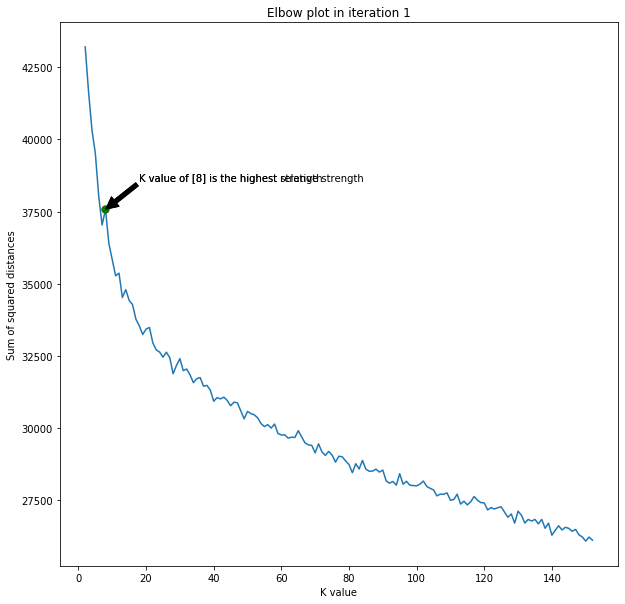

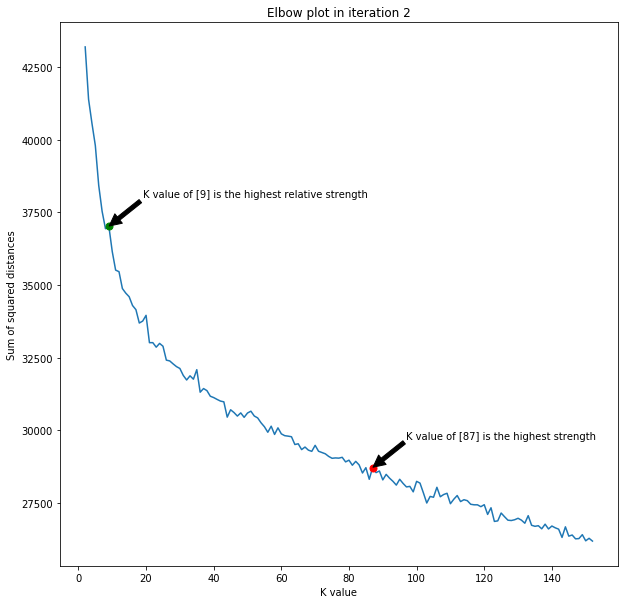

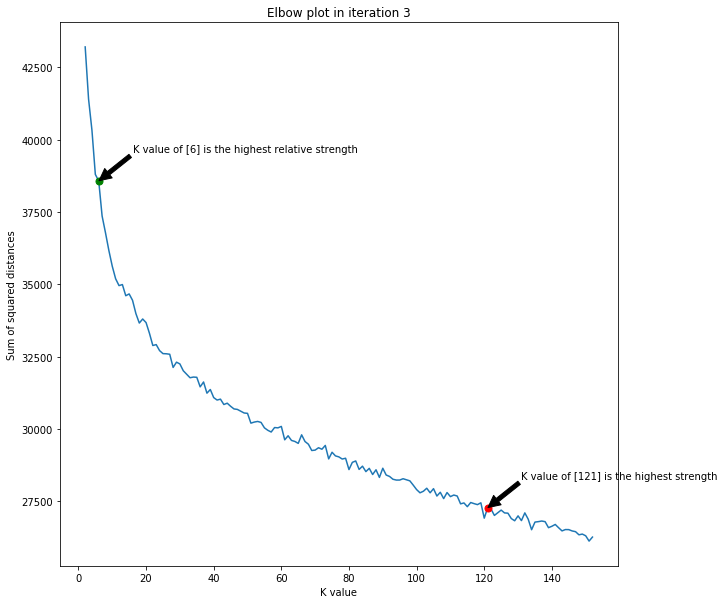

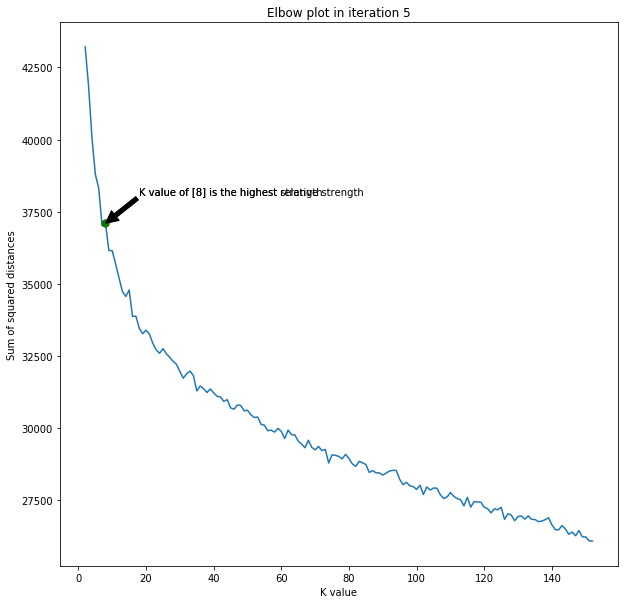

In [9]:
x1,y1,x_max_1,y_max_1,x_rel_max_1,y_rel_max_1 = get_values_for_plot(k_df_raw_1)
x2,y2,x_max_2,y_max_2,x_rel_max_2,y_rel_max_2 = get_values_for_plot(k_df_raw_2)
x3,y3,x_max_3,y_max_3,x_rel_max_3,y_rel_max_3 = get_values_for_plot(k_df_raw_3)
x4,y4,x_max_4,y_max_4,x_rel_max_4,y_rel_max_4 = get_values_for_plot(k_df_raw_4)
x5,y5,x_max_5,y_max_5,x_rel_max_5,y_rel_max_5 = get_values_for_plot(k_df_raw_5)

plot_elbow(x1,y1,x_max_1,y_max_1,x_rel_max_1,y_rel_max_1,1)
plot_elbow(x2,y2,x_max_2,y_max_2,x_rel_max_2,y_rel_max_2,2)
plot_elbow(x3,y3,x_max_3,y_max_3,x_rel_max_3,y_rel_max_3,3)
plot_elbow(x4,y4,x_max_4,y_max_4,x_rel_max_4,y_rel_max_4,4)
plot_elbow(x5,y5,x_max_5,y_max_5,x_rel_max_5,y_rel_max_5,5)